# 🐶🐱 Image Classification with CNN (Cats vs Dogs)

This notebook demonstrates how to build a **Convolutional Neural Network (CNN)** to classify images of cats and dogs using **TensorFlow Datasets (TFDS)**.  

We will:
- Load and preprocess the dataset  
- Build a CNN model  
- Train and evaluate the model  
- Save the trained model for later use in the Streamlit app

---

## Import Libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## Load cats_vs_dogs dataset

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

print(ds_info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/Users/kevinaccord/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy an

2025-10-16 01:46:17.323119: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-16 01:46:17.323160: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-16 01:46:17.323201: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-16 01:46:17.323238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-16 01:46:17.323251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Visualize a few training samples

2025-10-16 01:46:17.549323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


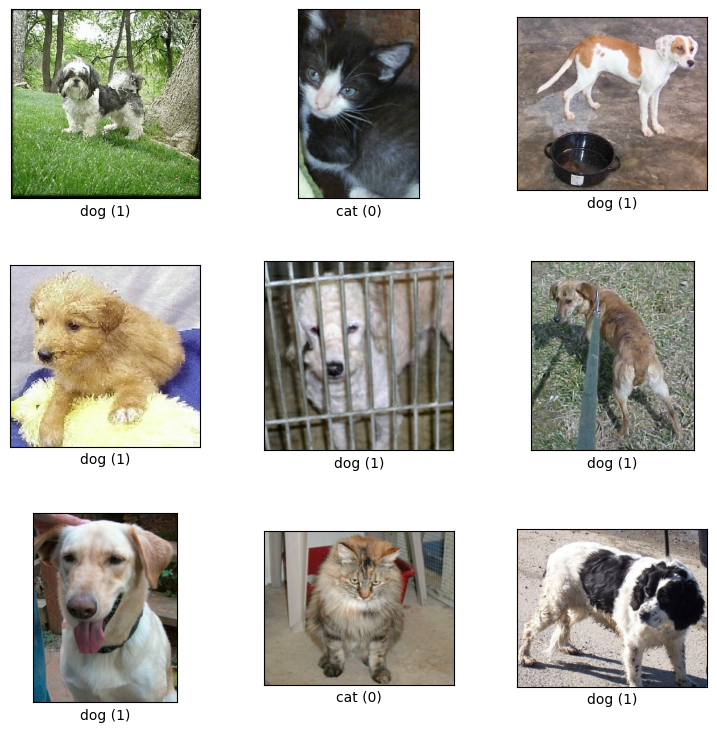

In [3]:
fig = tfds.show_examples(ds_train, ds_info)
plt.show()

## Preprocess Function

In [4]:
IMG_SIZE = 128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).cache().prefetch(tf.data.AUTOTUNE)

## Build CNN Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Users/kevinaccord/Downloads/python/Resume projects/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [6]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=5
)

Epoch 1/5


2025-10-16 01:46:18.798613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


582/582 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - accuracy: 0.5965 - loss: 0.6637 - val_accuracy: 0.6943 - val_loss: 0.5667
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 55s 94ms/step - accuracy: 0.7657 - loss: 0.4835 - val_accuracy: 0.7990 - val_loss: 0.4286
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 106ms/step - accuracy: 0.8161 - loss: 0.4046 - val_accuracy: 0.8224 - val_loss: 0.3825
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 105ms/step - accuracy: 0.8549 - loss: 0.3284 - val_accuracy: 0.8244 - val_loss: 0.4004
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 67s 115ms/step - accuracy: 0.8931 - loss: 0.2587 - val_accuracy: 0.8259 - val_loss: 0.4208


## Plot Training Curves

In [7]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

## Accuracy

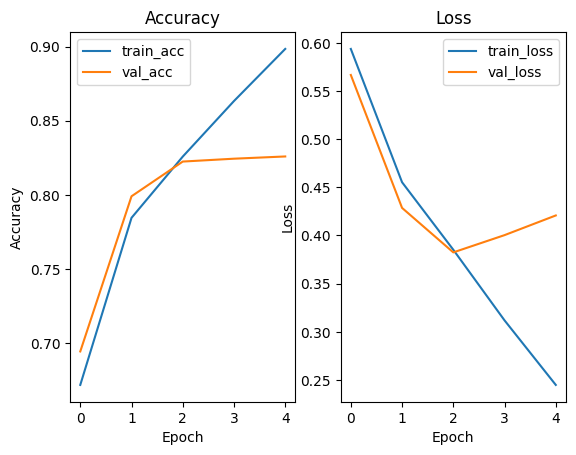

In [8]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluate on Test Set

In [9]:
test_loss, test_acc = model.evaluate(ds_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8194 - loss: 0.4319
✅ Test Accuracy: 0.8259


## Save Model

In [10]:
model.save('image-classification-project/src/cat_dog_cnn_model.h5')
print("Model saved to image-classification-project/src/cat_dog_cnn_model.h5")

Model saved to image-classification-project/src/cat_dog_cnn_model.h5


## ✅ Summary

- We successfully trained a CNN on the **Cats vs Dogs** dataset from TensorFlow Datasets.  
- The model achieved reasonable accuracy for a small number of epochs.  
- The saved model will be used in our Streamlit app for real-time predictions.

Next steps:
- Deploy this model with Streamlit.
- Optionally, experiment with more layers or data augmentation to improve accuracy.